# Test Notebook
In this notebook, I will test all the functions and classes that I am making in the main program to see the outcome of them dynamically.

## Evaluate the DataDivider class
in this part I will analyze the data and adjuct the DataDivider class for this assignment


In [35]:
# import the general libraries
import yaml
import os
import seaborn as sns
import numpy as np
import pandas as pd
from joblib import dump, load

# Isolation detection module
from sklearn.ensemble import IsolationForest

# statistical module
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

# Feature Engineering module
from sklearn.feature_selection import SelectKBest, chi2

# Model selection modules
from sklearn.model_selection import GridSearchCV

# Metric modules
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, auc


In [2]:
#inspired by https://fennaf.gitbook.io/bfvm22prog1/data-processing/configuration-files/yaml

def configReader():
    """
    explanation: This function open config,yaml file 
    and fetch the gonfigue file information
    input: ...
    output: configue file
    """
    with open("config.yaml", "r") as inputFile:
        config = yaml.safe_load(inputFile)
    return config

In [3]:
def dataframe_maker(config):
    file_directory, file_name,_,_ = config.values()
    os.chdir(file_directory)
    df = pd.read_csv(file_name).drop('Unnamed: 0', axis=1)
    return df
df = dataframe_maker(configReader())
df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [5]:
df.set_index('timestamp', inplace=True)
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [6]:
# some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220320 entries, 2018-04-01 00:00:00 to 2018-08-31 23:59:00
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sensor_00       210112 non-null  float64
 1   sensor_01       219951 non-null  float64
 2   sensor_02       220301 non-null  float64
 3   sensor_03       220301 non-null  float64
 4   sensor_04       220301 non-null  float64
 5   sensor_05       220301 non-null  float64
 6   sensor_06       215522 non-null  float64
 7   sensor_07       214869 non-null  float64
 8   sensor_08       215213 non-null  float64
 9   sensor_09       215725 non-null  float64
 10  sensor_10       220301 non-null  float64
 11  sensor_11       220301 non-null  float64
 12  sensor_12       220301 non-null  float64
 13  sensor_13       220301 non-null  float64
 14  sensor_14       220299 non-null  float64
 15  sensor_15       0 non-null       float64
 16  sensor_16       220289

In [7]:
# show the index of the dataset
df.index

DatetimeIndex(['2018-04-01 00:00:00', '2018-04-01 00:01:00',
               '2018-04-01 00:02:00', '2018-04-01 00:03:00',
               '2018-04-01 00:04:00', '2018-04-01 00:05:00',
               '2018-04-01 00:06:00', '2018-04-01 00:07:00',
               '2018-04-01 00:08:00', '2018-04-01 00:09:00',
               ...
               '2018-08-31 23:50:00', '2018-08-31 23:51:00',
               '2018-08-31 23:52:00', '2018-08-31 23:53:00',
               '2018-08-31 23:54:00', '2018-08-31 23:55:00',
               '2018-08-31 23:56:00', '2018-08-31 23:57:00',
               '2018-08-31 23:58:00', '2018-08-31 23:59:00'],
              dtype='datetime64[ns]', name='timestamp', length=220320, freq=None)

This dataset starts from April and ends at the end of August.

In [8]:
def file_divider(df, frequency='M'):

    # Make a series of the range in which wants to divide the data
    start_date = df.index.min()
    end_date = df.index.max()
    dates = pd.date_range(start=start_date, end=end_date, freq='M')

    # Slice around 60% of the dataset for training purpose
    train_month_number = int(len(dates) * 0.6) - 1
    df_train = df.loc[:dates[train_month_number]]

    # add test datasets to the divided dataframe dictionary using dic comprehension
    divided_df_dict = {f'df_test{number+1}': df.loc[dates[counter]:dates[counter+1]]
            for number, counter in enumerate(range(train_month_number, len(dates) - 1, 1))}
    
    # add training data to the dictionary
    divided_df_dict['df_train'] = df_train

    return divided_df_dict

    

I made the above function to divide the dataset into one train data (about 60% of the dataset), and divide rest of the dataset into a number od testing datasets. It can change dynamically based on the date range that is used as the input. Also, I made a version of this function to save the dataframes directly. 

In [9]:
def dataframe_divider(self, division_range='M'):
    """
    this method divide the dataset into definite number of 
    training and testing datasets, then save them in a determined path
    """
    # change the directory
    output_dir = self.config['output_path']
    os.makedirs(output_dir, exist_ok=True)

    # Make a series of the range in which wants to divide the data
    start_date = self.df.index.min()
    end_date = self.df.index.max()
    dates = pd.date_range(start=start_date, end=end_date, freq=division_range)

    # Slice around 60% of the dataset for training purpose
    train_month_number = int(len(dates) * 0.6) - 1
    df_train = self.df.loc[:dates[train_month_number]]

    # save the train dataset
    df_train.to_csv(os.path.join(output_dir, 'df_train.csv'))

    # save all the test sets
    for number, counter in enumerate(range(train_month_number, len(dates) - 1, 1)):
        df_test = self.df.loc[dates[counter]:dates[counter+1]]
        df_test.to_csv(os.path.join(output_dir, f'df_test{number+1}.csv'))

## DataDivider Class
This is one version of the this class.

In [ ]:
# This is another version of this class
import yaml
import os
import pandas as pd

class DataDivider():

    def __init__(self, input_path):
        self.config = self.config_reader(input_path)
        self.df = self.dataframe_maker()
        #self.output_dir = self.config['output_path']

    def config_reader(self, input_path):
        """
        explanation: This function open config,yaml file 
        and fetch the gonfigue file information
        input: ...
        output: configue file
        """
        with open(input_path, "r", encoding="utf8") as input_file:
            config = yaml.safe_load(input_file)

        return config

    def dataframe_maker(self):
        """
        make the main dataset based on the configuration file
        """
        # make the dataframe
        file_directory, file_name, _ = self.config.values()
        os.chdir(file_directory)
        df = pd.read_csv(file_name).drop('Unnamed: 0', axis=1)

        # change the type of the timestamp column
        df['timestamp'] = pd.to_datetime(df['timestamp'])

        # set timestamp column as the index
        df.set_index('timestamp', inplace=True)

        return df

    def dataframe_divider(self, division_range='M'):
        """
        this method divide the dataset into definite number of 
        training and testing datasets, then save them in a determined path
        """

        # Make a series of the range in which wants to divide the data
        start_date = self.df.index.min()
        end_date = self.df.index.max()
        dates = pd.date_range(start=start_date, end=end_date, freq='M')

        # Slice around 60% of the dataset for training purpose
        train_month_number = int(len(dates) * 0.6) - 1
        df_train = self.df.loc[:dates[train_month_number]]

        # add test datasets to the divided dataframe dictionary using dic comprehension
        divided_df_dict = {f'df_test{number+1}': self.df.loc[dates[counter]:dates[counter+1]]
                for number, counter in enumerate(range(train_month_number, len(dates) - 1, 1))}
        
        # add training data to the dictionary
        divided_df_dict['df_train'] = df_train

        return divided_df_dict

    def dataframe_saver(self, df_dict):
        """
        this method saves the dataframes in a path
        """
        output_dir = self.config['output_path']
        for df_name in df_dict.keys():
            df_dict[df_name].to_csv(os.path.join(output_dir, f'{df_name}.csv'))

if __name__ == '__main__':

    # run the DataDivider class
    divider = DataDivider('config.yaml')
    df_dict = divider.dataframe_divider()
    divider.dataframe_saver(df_dict)


In this stage I will make DataManager class first, then I will make Model clas

## DataManager
The necessary steps are borrowed from my educational notebook. Here, I only used the best preprocessing pipeline.

In the first part, I will implement the best preprocessing that I could find.

### Preprocesing
I will use the following preprocessing pipeline for this assignment

In [10]:
df_copy = df.copy()

#### **preprocessing**

In [11]:
# drop redundant redundant columns
df_copy.drop(['sensor_15', 'sensor_50', 'sensor_51'],inplace = True,axis=1)

# Fill the null values
df_copy.iloc[:,:-1] = df_copy.iloc[:,:-1].fillna(method='bfill')


In [12]:
def smoothing_data(df, smoothing_par, smoothing_method='exponential', standardization=True):
    copy_df = df.copy()
    float_df = df.iloc[:,:49]

    if smoothing_method == 'rolling_mean':
        #calculate rolling mean
        smoothed_df = float_df.rolling(window=smoothing_par, min_periods=1).mean()
    
    else:
        #calculate exponential smoothing technique
        smoothed_dfs = {}

        for column in float_df.columns:
            model = SimpleExpSmoothing(float_df[column])
            smoothed_model = model.fit(smoothing_level=smoothing_par, optimized=True,)
            smoothed_dfs[column] = smoothed_model.fittedvalues

        smoothed_df = pd.DataFrame(smoothed_dfs)

    # standardize the dataframe
    if standardization:
        smoothed_df = smoothed_df.apply(lambda x: (x - x.mean()) / x.std())

    copy_df.iloc[:, :49] = smoothed_df

    return copy_df

In [13]:
smoothed_df = smoothing_data(df_copy, None, 'exponential')

c:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
c:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
c:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
c:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
c:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
c:\Anaconda3\lib\site-packages\stat

#### **Normalization**

In [14]:
# Normalize the dataset ('min_max' method)
smoothed_df.iloc[:,:-1] = smoothed_df.iloc[:,:-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [15]:
smoothed_df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,0.967656,0.679448,0.876598,0.886646,0.904299,0.764272,0.602870,0.683733,0.639780,0.602086,...,0.025424,0.027367,0.045424,0.024159,0.133860,0.071489,0.039794,0.245949,0.093861,NORMAL
2018-04-01 00:01:00,0.967890,0.678843,0.876766,0.885900,0.904084,0.764561,0.602902,0.683734,0.639681,0.602128,...,0.025424,0.027367,0.045424,0.024242,0.133860,0.071489,0.039794,0.245949,0.093861,NORMAL
2018-04-01 00:02:00,0.967922,0.678494,0.876894,0.885460,0.903984,0.764594,0.602905,0.683734,0.639661,0.602138,...,0.025424,0.027367,0.045424,0.024277,0.133860,0.071489,0.039794,0.245949,0.093861,NORMAL
2018-04-01 00:03:00,0.960908,0.682026,0.876991,0.887351,0.907382,0.738774,0.599371,0.679802,0.641305,0.600828,...,0.024127,0.027367,0.044750,0.023997,0.132881,0.072326,0.039794,0.242184,0.092546,NORMAL
2018-04-01 00:04:00,0.965310,0.680335,0.876612,0.888466,0.900753,0.766351,0.598740,0.688521,0.644239,0.602696,...,0.024120,0.026632,0.042723,0.023586,0.130917,0.072330,0.039794,0.242165,0.091882,NORMAL


#### **feature engineering** 

In [16]:
def making_one_hot(df):
    
    # make one hot encoder
    status_series = df.machine_status
    one_hot = pd.get_dummies(status_series)
    one_hot = one_hot.astype(int)
    return one_hot

def feature_engineering(df):

    float_df = df.iloc[:,:49]

    # make one hot encoder
    one_hot = making_one_hot(df)
    
    # extract feature importance scores
    selector = SelectKBest(score_func=chi2)
    selector.fit(float_df, one_hot['NORMAL'])
    
    return selector

def score_sorter(df, fit):
    rank_dict = {}
    names = df.columns

    # make a dictionary of scores
    for number, _ in enumerate(fit.scores_):
        rank_dict[names[number]] = fit.scores_[number]

    # sort the scores
    rank_dict = dict(sorted(rank_dict.items(), key=lambda item: -1 * item[1]))

    return rank_dict

def cropping_df(df, fit, slice_number):

    # make the rank dictionary
    rank_dict = score_sorter(df, fit)

    # make name list
    name_list = list(rank_dict.keys())[:slice_number]
    

    # crop the dataframe
    selected_df = df.iloc[:,:49].loc[:,name_list]
    selected_df['machine_status'] = df['machine_status']

    return selected_df

In [17]:
# run SelectKBest
selector = feature_engineering(smoothed_df)

selected_df = cropping_df(smoothed_df, selector, 12)
selected_df.head()

,sensor_00,sensor_11,sensor_12,sensor_04,sensor_10,sensor_06,sensor_02,sensor_07,sensor_13,sensor_08,sensor_09,sensor_48,machine_status
timestamp,,,,,,,,,,,,,
2018-04-01 00:00:00,0.967656,0.792070,0.691492,0.904299,0.489296,0.602870,0.876598,0.683733,0.054064,0.639780,0.602086,0.245949,NORMAL
2018-04-01 00:01:00,0.967890,0.792070,0.691492,0.904084,0.489296,0.602902,0.876766,0.683734,0.054064,0.639681,0.602128,0.245949,NORMAL
2018-04-01 00:02:00,0.967922,0.792070,0.691492,0.903984,0.489296,0.602905,0.876894,0.683734,0.054064,0.639661,0.602138,0.245949,NORMAL
2018-04-01 00:03:00,0.960908,0.802954,0.712980,0.907382,0.497670,0.599371,0.876991,0.679802,0.054869,0.641305,0.600828,0.242184,NORMAL
2018-04-01 00:04:00,0.965310,0.810934,0.703873,0.900753,0.507023,0.598740,0.876612,0.688521,0.051105,0.644239,0.602696,0.242165,NORMAL


Based on the above preprocessing steps the following set of classes are made.

In [18]:
# General libraries
import pandas as pd

# statistical libraries
from statsmodels.tsa.api import  SimpleExpSmoothing

# Feature Engineering module
from sklearn.feature_selection import SelectKBest, chi2


class DataManager():

    def __init__(self, df, fill_method, smoothing_par, smoothing_method, norm_name):
        self.df = df

        # Preprocessing parameters
        self.fill_method = fill_method
        self.smoothing_par = smoothing_par
        self.smoothing_method = smoothing_method

        # Normalization parameters
        self.norm_name = norm_name

    def dataframe_manager(self):
        """
        This function implements all the preprocessing steps on the dataframe
        and returns the transformed dataset to the main function.
        """
        # Preprocessing part
        preprocessing_obj = Prprocessing(self.df, self.fill_method, self.smoothing_par,
                                         self.smoothing_method)
        self.df = preprocessing_obj.datframe_pruner()
        self.df = preprocessing_obj.dataframe_smoother()

        # Normalization part
        normalization_obj = Normalization(self.df, self.norm_name)
        self.df = normalization_obj.method_selector()

        # Feature engineering
        feature_engineering_obj = FeatureEngineering(self.df)
        self.df = feature_engineering_obj.dataframe_cropper(12)

        return self.df

class Prprocessing():

    def __init__(self, df, fill_method, smoothing_par, smoothing_method):
        self.df = df 
        self.fill_method = fill_method
        self.smoothing_par = smoothing_par
        self.smoothing_method = smoothing_method

    def datframe_pruner(self):
        """
        This function prune (drop) the necessary data columns and fill the Nan values
        """
        # Make a copy of the dataset
        df_processed = self.df.copy()

        # Drop redundant columns
        df_processed.drop(['sensor_15', 'sensor_50', 'sensor_51'],inplace = True,axis=1)

        # Fill the null values
        df_processed.iloc[:,:-1] = df_processed.iloc[:,:-1].fillna(method=self.fill_method)

        return df_processed

    def dataframe_smoother(self):
        """
        This function implements a smoothing technique on the dataset
        """
        df_copy = self.df.copy()

        # Slice the floating part
        float_df = self.df.iloc[:,:49]

        if self.smoothing_method == 'rolling_mean':
            #calculate rolling mean
            smoothed_df = float_df.rolling(window=self.smoothing_par, min_periods=1).mean()

        else:
            #calculate exponential smoothing technique
            smoothed_dfs = {}

            for column in float_df.columns:
                model = SimpleExpSmoothing(float_df[column])
                smoothed_model = model.fit(smoothing_level=self.smoothing_par, optimized=True,)
                smoothed_dfs[column] = smoothed_model.fittedvalues

            smoothed_df = pd.DataFrame(smoothed_dfs)

            df_copy.iloc[:, :49] = smoothed_df

        return df_copy

class Normalization():

    def __init__(self, df, norm_name):
        self.df = df
        self.norm_name = norm_name

    def max_normalizer(self): 
        """
        This function returns 'max' normalization
        """
        df_normalized = self.df.apply(lambda x: x / x.abs().max())
        return df_normalized

    def min_max_normalizer(self):
        """
        This function returns 'min_max normalization
        """
        df_normalized = self.df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
        return df_normalized

    def z_score_normalizer(self):
        """
        This function returns z-score normalization
        """
        df_normalized = self.df.apply(lambda x: (x - x.mean()) / x.std())
        return df_normalized

    def method_selector(self):
        """
        input: 1- method_name: this string determines the method's type.
        explanation: This function chooses the right endmember extraction method based
                     on the input name. And, return the endmembers based on the method.
        output: 1- an endmember method
        """
        # make the function name
        method_name = f'{self.norm_name}_normalizer'
        normalization_method = getattr(self, method_name)

        # return the spectrum
        return normalization_method()

class FeatureEngineering():

    def __init__(self, df):
        self.df = df
        self.selector = self.feature_engineering()
    
    def making_one_hot(self):
        """
        This function make one_hot encoder from label column
        """
        # make one hot encoder
        status_series = self.df.machine_status
        one_hot = pd.get_dummies(status_series)
        one_hot = one_hot.astype(int)
        return one_hot

    def feature_engineering(self):
        """
        This function implements SelectKBest model on the dataset
        """
        float_df = self.df.iloc[:,:49]

        # make one hot encoder
        one_hot = self.making_one_hot()

        # extract feature importance scores
        selector = SelectKBest(score_func=chi2)
        selector.fit(float_df, one_hot['NORMAL'])

        return selector

    def score_sorter(self):
        """
        This function make a sorted dictionary of the columns and their
        scores in an ascending manner
        """
        rank_dict = {}
        names = self.df.columns

        # make a dictionary of scores
        for number,_ in enumerate(self.selector.scores_):
            rank_dict[names[number]] = self.selector.scores_[number]

        # sort the scores
        rank_dict = dict(sorted(rank_dict.items(), key=lambda item: -1 * item[1]))

        return rank_dict

    def dataframe_cropper(self, slice_number):
        """
        This function crops the columns in the dataset with the highest
        scores in another dataset
        """
        # make the rank dictionary
        rank_dict = self.score_sorter()

        # make name list
        name_list = list(rank_dict.keys())[:slice_number]

        # crop the dataframe
        selected_df = self.df.iloc[:,:49].loc[:,name_list]
        selected_df['machine_status'] = self.df['machine_status']

        return selected_df


Now this is the time for training the model.

# Model Training
While working on Assignment 3 for Machine Learning, I discovered that the 'Isolation Forest' model is exceptionally well-suited for this particular dataset (one can have a look at the mentioned assignment for tones of detail about all the methods :)). As a result, I've decided to employ this model for our task. To optimize its performance, I'll utilize GridSearchCV to fine-tune its parameters. For evaluating the model's effectiveness, I'll consider metrics such as 'f1', 'ROC-AUC', and accuracy.

However, I'm prioritizing accuracy as the primary assessment metric for this method. The reason behind this choice is that the model's key strength lies in its ability to accurately predict system malfunctions.

In [19]:
def multiple_grid_search(estimator_dict, scoring_list, cv_number, refit_method, data_dict):

    final_dict = {}

    for name in estimator_dict.keys():
        # Create the GridSearchCV object
        grid_search = GridSearchCV(estimator=estimator_dict[name][0], param_grid=estimator_dict[name][1],
                                    scoring=scoring_list, cv=cv_number, refit=refit_method)
        
        # Fit the the best model to the data
        grid_search.fit(data_dict['x'], data_dict['y'])

        # Save the best estimator for each model
        final_dict[name] = {'best_model': grid_search.best_estimator_,
                            'best_parameters': grid_search.best_params_,
                            'best_score': grid_search.best_score_}

    # order the dictionary based on the magnitude of the scores
    final_dict = dict(sorted(final_dict.items(), key=lambda item: -1 * item[1]['best_score']))
     
    return final_dict

In [20]:
def model_trainer(df):

    # Convert label column into 1 and -1, ro make it comparable to the model 
    y_train = [1 if element=='NORMAL' else -1 for element in df.iloc[:,-1]]
    X = np.array(df.iloc[:,:-1])

    # Make data dictionary
    data_dict =  {'x': X, 
                'y': y_train}

    # Find the outlier fraction in the dataset
    normal_rows = df[df['machine_status']=='NORMAL']
    outliers_fraction = 1 - (len(normal_rows)/(len(df)))

    # make parameters dictionaries for Isolation Forest
    if_param= {
        'n_estimators': [100],
        'max_samples': [1.0],
        'contamination': [outliers_fraction],
        'max_features': [1.0],
        'n_jobs': [-1]
        }

    # Scoring list
    scoring_list = {'roc_auc', 'accuracy', 'f1'}

    # Make estimator dictionary
    estimator_dict={'IsolationForest': [IsolationForest(), if_param]}

    final_dict = multiple_grid_search(estimator_dict, scoring_list, 5, 'accuracy', data_dict)

    return final_dict

In [21]:
final_dict = model_trainer(selected_df)

c:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "c:\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "c:\Anaconda3\lib\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  File "c:\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 339, in _binary_roc_auc_score
    raise ValueError(
ValueError: Only one class pres

In [22]:
final_dict

{'IsolationForest': {'best_model': IsolationForest(contamination=0.06574074074074077, max_samples=1.0, n_jobs=-1),
  'best_parameters': {'contamination': 0.06574074074074077,
   'max_features': 1.0,
   'max_samples': 1.0,
   'n_estimators': 100,
   'n_jobs': -1},
  'best_score': 0.8786810094408132}}

Now, I will using the model to predict and also, evaluate the result bu using evaluation metrics.

In [24]:
y_train = [1 if element=='NORMAL' else -1 for element in selected_df.iloc[:,-1]]

In [25]:
y_pred = final_dict['IsolationForest']['best_model'].predict(selected_df.iloc[:,:-1])

c:\Anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


In [26]:
selected_df['IsolationForest'] = y_pred

In the next step, I will make a function to plot the sensors functions along with their anomalities. I will use the function from the assignment 3 of machine learning and convert it into a proper form for this assignment.

In [27]:
import matplotlib.pyplot as plt

def plot_sensor_anomalies(df, sensor_names, column_name='machine_status', anomaly_method_name=None):
    broken_rows = df[df[column_name] == 'BROKEN']
    recovery_rows = df[df[column_name] == 'RECOVERING']

    fig, axes = plt.subplots(nrows=len(sensor_names), ncols=1, figsize=(25, 3*len(sensor_names)))

    # Flatten the axes array if it's not already 1D
    if len(sensor_names) == 1:
        axes = [axes]

    else:
        axes = axes.flatten()

    for number, ax in enumerate(axes):
        
        ax.plot(df[sensor_names[number]], color='grey')
        ax.plot(recovery_rows[sensor_names[number]], linestyle='none', marker='o',
                 color='yellow', markersize=5, label='recovering', alpha=0.5)
        ax.plot(broken_rows[sensor_names[number]], linestyle='none', marker='X',
                 color='red', markersize=20, label='broken')

        if anomaly_method_name is not None:
            anomaly_rows = df[df[anomaly_method_name] == -1]
            ax.plot(anomaly_rows[sensor_names[number]], linestyle='none', marker='X',
                     color='blue', markersize=7, label='anomaly predicted', alpha=0.2)

        ax.set_title(sensor_names[number])
        ax.legend()
    return fig

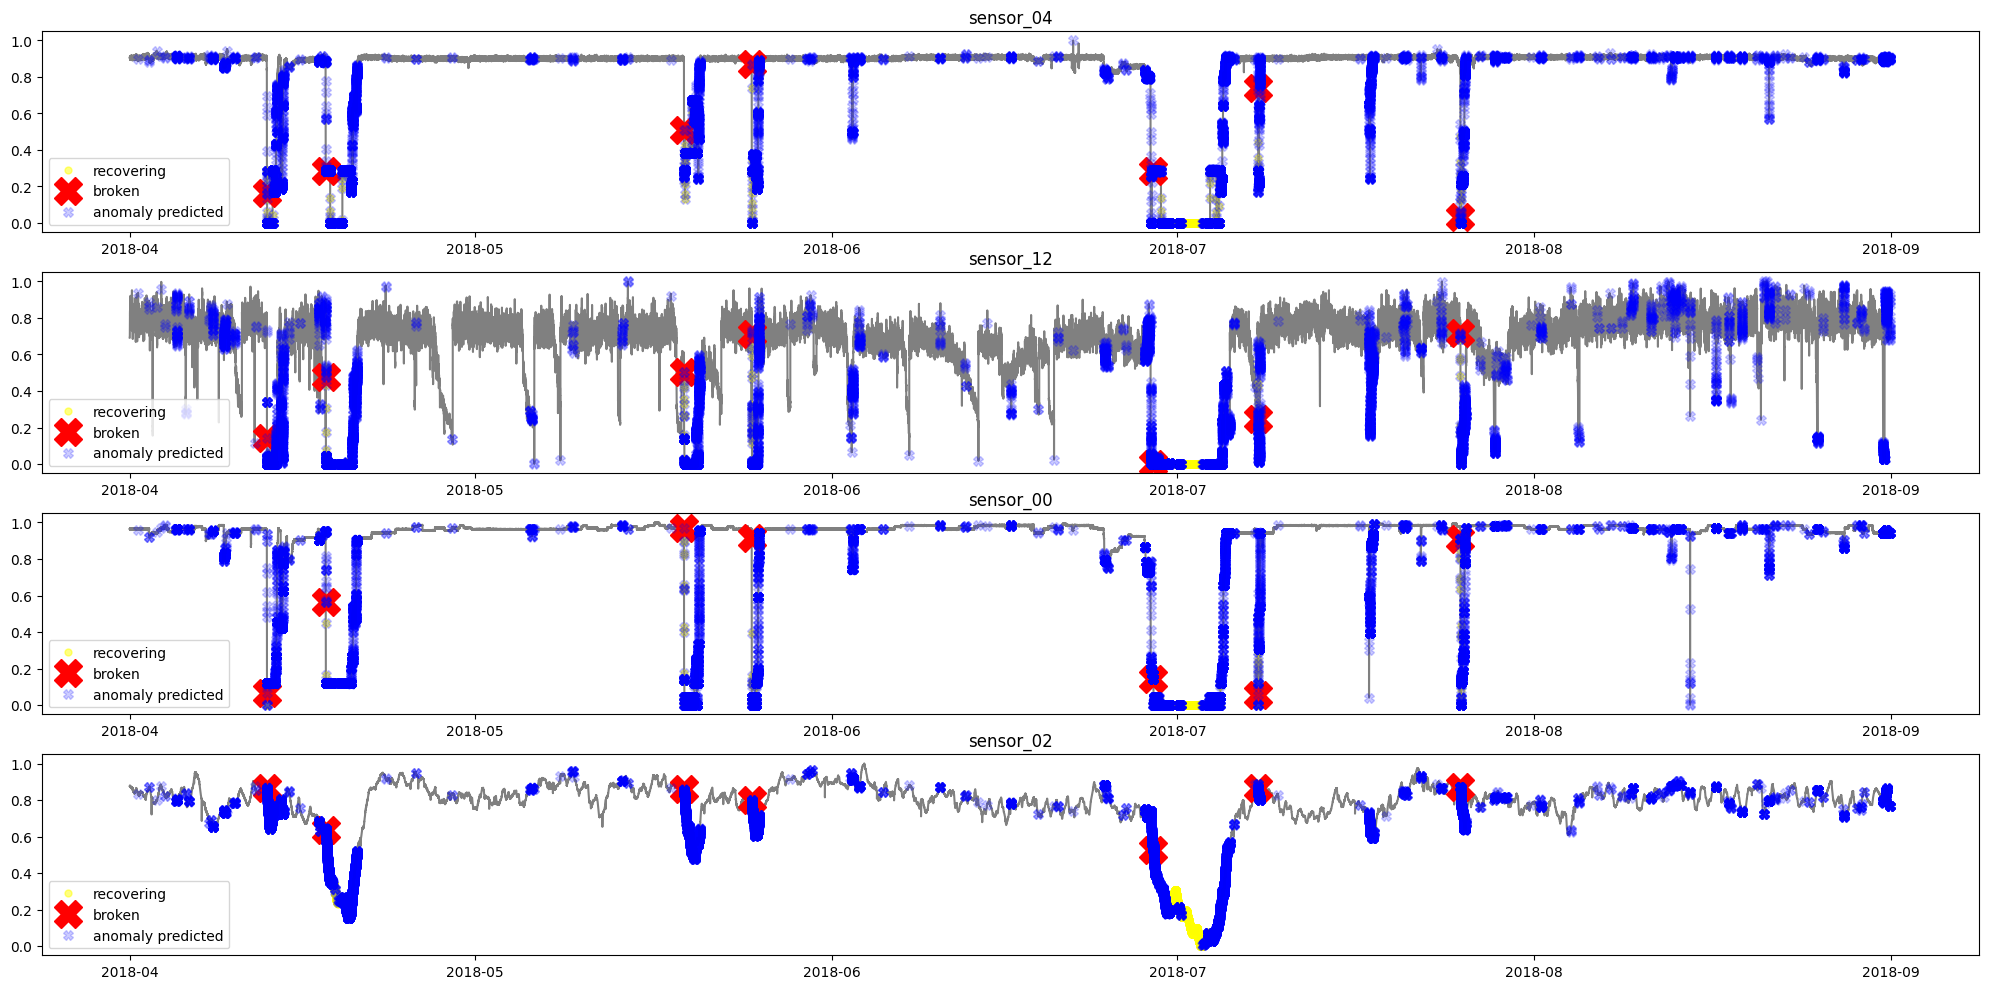

In [28]:
figure = plot_sensor_anomalies(selected_df, ['sensor_04','sensor_12', 'sensor_00', 'sensor_02'], anomaly_method_name='IsolationForest')

# Evaluation Metrics
In the last part of this notebook, I will add some evaluation metrics, their functions, and their plots.

In [29]:
def f_score(y_actual, y_predict):

    precision = precision_score(y_actual, y_predict)
    recall = recall_score(y_actual, y_predict)

    f_score = (2.0 * precision * recall) / (precision + recall)

    return f_score

def precision(y_actual, y_predict):
    return precision_score(y_actual, y_predict)

def recall(y_actual, y_predict):
    return recall_score(y_actual, y_predict)

def confusion(y_actual, y_predict):
    return confusion_matrix(y_actual, y_predict)

def accuracy(y_actual, y_predict):

    cm = confusion_matrix(y_actual, y_predict)

    acc = (cm[0,0] + cm[1,1]) / (cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])

    return acc

def auc_roc(y_actual, y_predict):
    fp, tp, threshold = roc_curve(y_actual, y_predict)
    area = auc(fp, tp)

    auc_roc_dict = {
                    'false_positive': fp,
                    'true_positive': tp,
                    'threshold': threshold,
                    'auc': area
                    }
    return auc_roc_dict

def evaluation_metrics_calculator(metric_names, y_actual, y_predict):

    evaluation_dict = {}
    for name in metric_names:
        evaluation_method = getattr(self, method_name)
        evaluation_dict[name] = evaluation_method()
    #evaluation_dict = {name:getattr(self, method_name)() for name in metric_names}
    # return the evaluation dictionary
    return evaluation_dict


Making confusion matrix heatmap

In [50]:
def cm_plot(cm, logarithm=False):

    if logarithm:
        cm = np.log(cm)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), layout='constrained')

    # Create a heatmap of the confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)
    ax.set(aspect='equal',
        xlabel='Predicted Labels',
        ylabel='$True Labels$')

    ax.set_title('Confusion Matrix')
    return fig

In [51]:
# calculate confusion matrix
cm = confusion(y_train, y_pred)

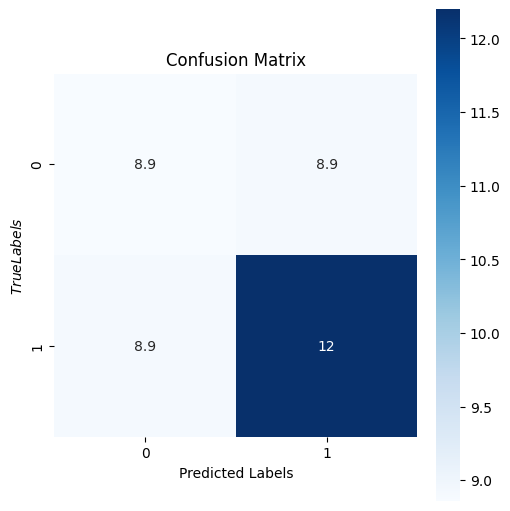

In [53]:
figure = cm_plot(cm, True)

Making AUC_ROC curve plot

In [54]:
auc_dict = auc_roc(y_train, y_pred)
auc_dict

{'false_positive': array([0.        , 0.51408451, 1.        ]),
 'true_positive': array([0.        , 0.96382557, 1.        ]),
 'threshold': array([ 2,  1, -1]),
 'auc': 0.724870531414453}

In [61]:
def auc_roc_plotter(auc_dict):

    auc = auc_dict['auc']
    # Plot the ROC curve

    fig, ax = plt.subplots(figsize=(5, 5))  
    ax.plot(auc_dict['false_positive'], auc_dict['true_positive'], color='red',
            lw=2, label=f'ROC curve (AUC = {auc:.2f})')  
    ax.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])  
    ax.set_ylim([0.0, 1.05])  
    ax.set_xlabel('False Positive Rate') 
    ax.set_ylabel('True Positive Rate')  
    ax.set_title('Receiver Operating Characteristic')  
    ax.legend(loc="lower right")

    return fig

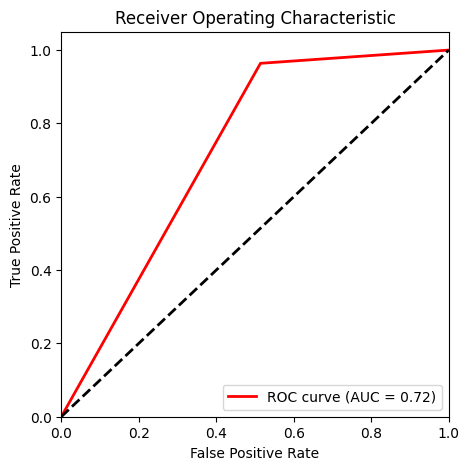

In [63]:
figure = auc_roc_plotter(auc_dict)